# PySDDR test run

In [1]:
# import the sddr module
from sddr import SDDR
import torch.nn as nn
from pandas import read_csv


Bad key "text.kerning_factor" on line 4 in
/home/haicu/dominik.thalmeier/anaconda3/envs/TorchKernel/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# First use case: A Simple GAM Poisson Distribution

### The user defines the data, distribution and training parameters in the next cell

Alternatively these parameters can be defined in a config file (for example see config.yaml)

In [2]:
data_path = './example_data/simple_gam/X.csv'
target_path = './example_data/simple_gam/Y.csv'

data = read_csv(data_path,delimiter=';')
target = read_csv(target_path)

output_dir = './outputs'

distribution  = 'Poisson'

formulas = {'rate': '~1+spline(x1, bs="bs",df=9)+spline(x2, bs="bs",df=9)+d1(x1)+d2(x2)'}
deep_models_dict = {
'd1': {
    'model': nn.Sequential(nn.Linear(1,15)),
    'output_shape': 15},
'd2': {
    'model': nn.Sequential(nn.Linear(1,3),nn.ReLU(), nn.Linear(3,8)),
    'output_shape': 8}
}

train_parameters = {
'batch_size': 1000,
'epochs': 2500,
'regularization_params': {'rate': 1}
}

### The sddr instance is initialized with the parameters given by the user in the previous step

In [3]:
sddr = SDDR(data=data,
            target=target,
            output_dir=output_dir,
            distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters)

### The SDDR network is trained with the data defined above

In [4]:
sddr.train()

Beginning training ...
Train Epoch: 0 	 Loss: 158.695969
Train Epoch: 100 	 Loss: 48.129780
Train Epoch: 200 	 Loss: 46.617596
Train Epoch: 300 	 Loss: 46.551979
Train Epoch: 400 	 Loss: 46.565056
Train Epoch: 500 	 Loss: 46.571556
Train Epoch: 600 	 Loss: 46.574574
Train Epoch: 700 	 Loss: 46.581223
Train Epoch: 800 	 Loss: 46.581879
Train Epoch: 900 	 Loss: 46.579853
Train Epoch: 1000 	 Loss: 46.579975
Train Epoch: 1100 	 Loss: 46.580879
Train Epoch: 1200 	 Loss: 46.580826
Train Epoch: 1300 	 Loss: 46.580498
Train Epoch: 1400 	 Loss: 46.580544
Train Epoch: 1500 	 Loss: 46.580654
Train Epoch: 1600 	 Loss: 46.580654
Train Epoch: 1700 	 Loss: 46.580601
Train Epoch: 1800 	 Loss: 46.580612
Train Epoch: 1900 	 Loss: 46.580624
Train Epoch: 2000 	 Loss: 46.580620
Train Epoch: 2100 	 Loss: 46.580612
Train Epoch: 2200 	 Loss: 46.580601
Train Epoch: 2300 	 Loss: 46.580601
Train Epoch: 2400 	 Loss: 46.580605


### Visualize the partial effects

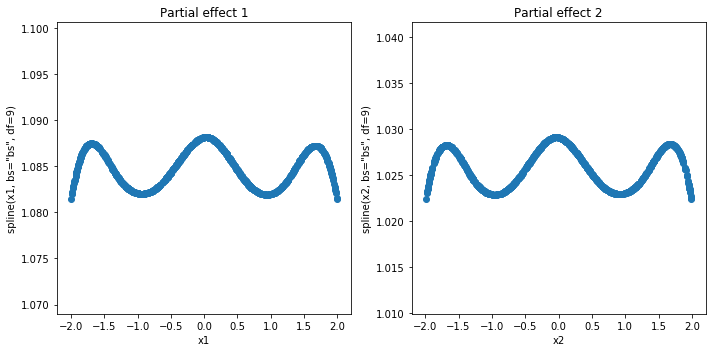

In [5]:
partial_effects = sddr.eval('rate')

# Second use case: GAMLSS - Normal Distribution

### The user defines the data, distribution and training parameters in the next cell

Alternatively these parameters can be defined in a config file (for example see config.yaml)

In [6]:
# second example
x_path = './example_data/gamlss/X.csv'
y_path = './example_data/gamlss/Y.csv'

data = read_csv(x_path,delimiter=';')
target = read_csv(y_path)

output_dir = './outputs'

distribution  = 'Normal'

formulas = {'loc': '~1+spline(x1, bs="bs", df=9)+spline(x2, bs="bs",df=9) + d1(x1)+d2(x2)',
            'scale': '~1 + spline(x3, bs="bs",df=9) + spline(x4, bs="bs",df=9)'
            }

deep_models_dict = {
'd1': {
    'model': nn.Sequential(nn.Linear(1,15)),
    'output_shape': 15},
'd2': {
    'model': nn.Sequential(nn.Linear(1,3),nn.ReLU(), nn.Linear(3,8)),
    'output_shape': 8}
}

train_parameters = {
'batch_size': 1000,
'epochs': 2500,
'regularization_params': {'loc':1, 'scale':1}
}

### The sddr instance is initialized with the parameters given by the user in the previous step

In [7]:
sddr = SDDR(data=data,
            target=target,
            output_dir=output_dir,
            distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters)

### The SDDR network is trained with the data defined above

In [8]:
sddr.train()

Beginning training ...
Train Epoch: 0 	 Loss: 136.859741
Train Epoch: 100 	 Loss: 3.135251
Train Epoch: 200 	 Loss: 3.330872
Train Epoch: 300 	 Loss: 3.101065
Train Epoch: 400 	 Loss: 3.177852
Train Epoch: 500 	 Loss: 3.316501
Train Epoch: 600 	 Loss: 3.257336
Train Epoch: 700 	 Loss: 3.193805
Train Epoch: 800 	 Loss: 3.213896
Train Epoch: 900 	 Loss: 3.238971
Train Epoch: 1000 	 Loss: 3.229789
Train Epoch: 1100 	 Loss: 3.221246
Train Epoch: 1200 	 Loss: 3.224977
Train Epoch: 1300 	 Loss: 3.227934
Train Epoch: 1400 	 Loss: 3.226393
Train Epoch: 1500 	 Loss: 3.225383
Train Epoch: 1600 	 Loss: 3.225992
Train Epoch: 1700 	 Loss: 3.226319
Train Epoch: 1800 	 Loss: 3.226073
Train Epoch: 1900 	 Loss: 3.225953
Train Epoch: 2000 	 Loss: 3.226044
Train Epoch: 2100 	 Loss: 3.226074
Train Epoch: 2200 	 Loss: 3.226033
Train Epoch: 2300 	 Loss: 3.226017
Train Epoch: 2400 	 Loss: 3.226023


### Visualize the partial effects

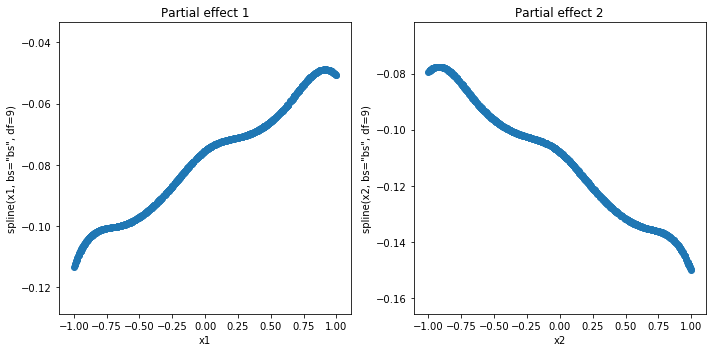

In [9]:
partial_effects = sddr.eval('loc')

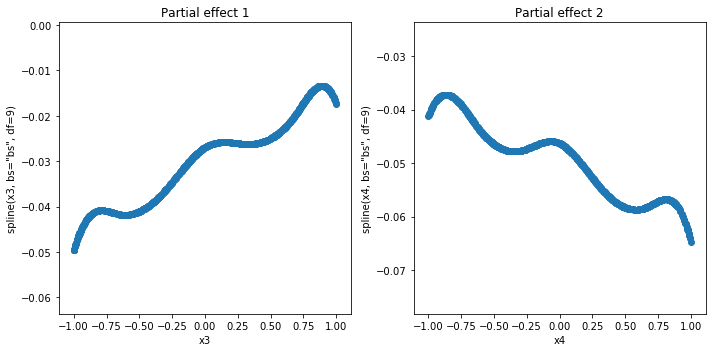

In [10]:
partial_effects = sddr.eval('scale')